In [47]:
stopwords = [
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', 
    '고', '면', '며', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', 
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '일', '문제', '경우', '부분', 
    '내용', '결과', '자체', '가지',
    '뿐', '대로', '만큼', '만', '지', '따름', '나름', '김에', '터',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니',
]

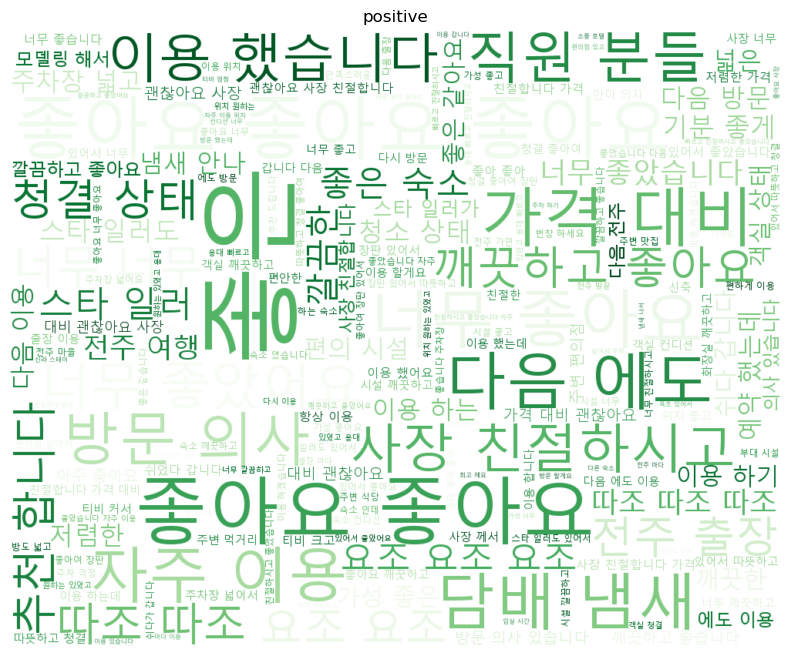

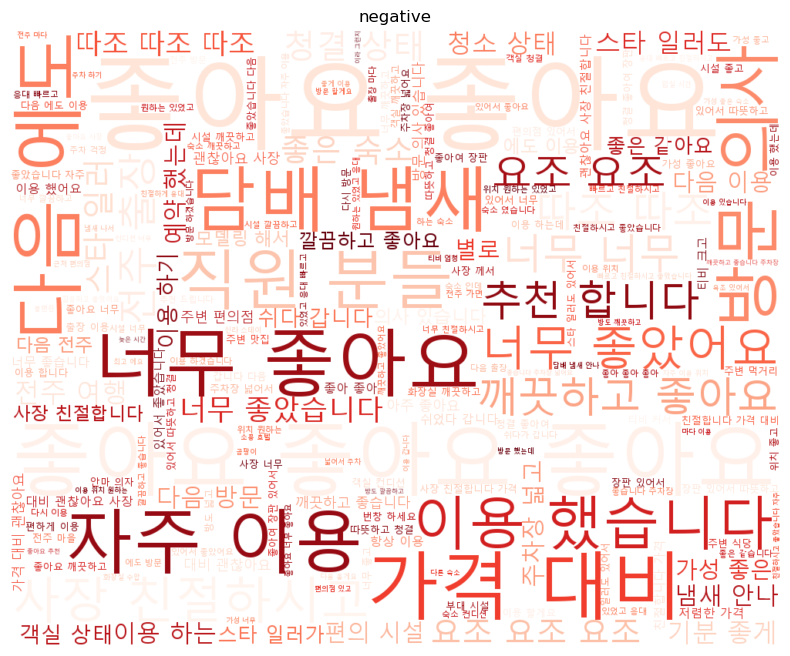

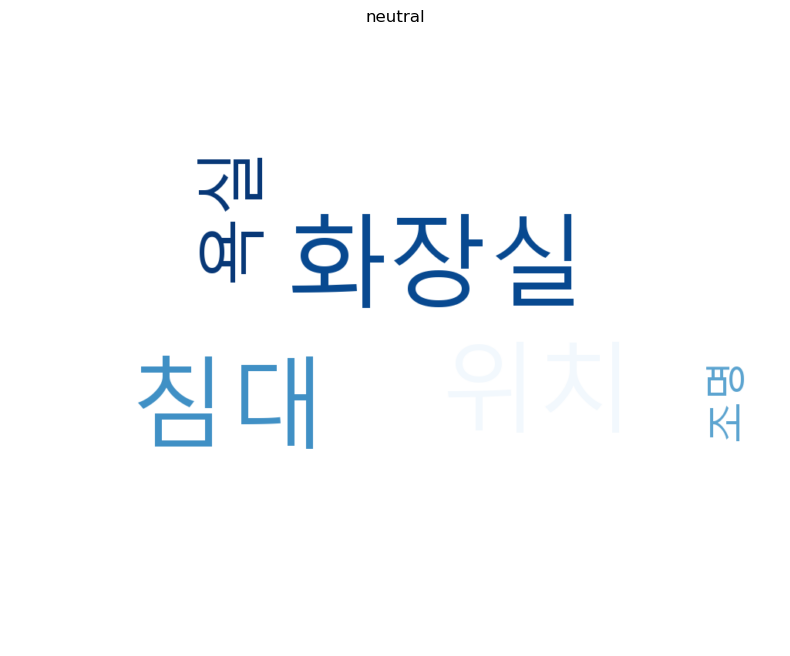

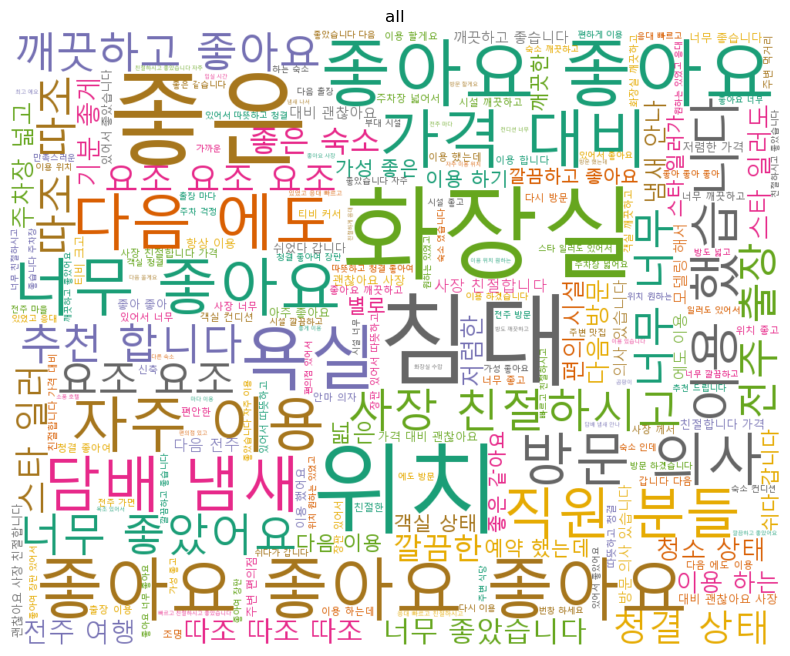

In [ ]:
import pandas as pd
from konlpy.tag import Okt
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams

# 파일 경로
review_file = 'all_reviews.csv'
senti_file = 'word.json'

# 1. 감성 사전 로딩
with open(senti_file, 'r', encoding='utf-8') as f:
    senti_list = json.load(f)

# 2. 감성별 단어 집합 만들기
positive_set = set()
negative_set = set()
neutral_set = set()

for item in senti_list:
    word = item["word"]
    polarity = item["polarity"]
    if polarity == "1":
        positive_set.add(word)
    elif polarity == "-1":
        negative_set.add(word)
    elif polarity == "0":
        neutral_set.add(word)

# 2. 리뷰 데이터 로딩
df = pd.read_csv(review_file, encoding='utf-8-sig')
df['sentence'] = df['sentence'].astype(str)

# 3. 형태소 분석 및 불용어 제거
okt = Okt()

nouns_train_data = []
#morphs_train_data = []

for text in df['review_content']:
    morphs = [w for w in okt.morphs(text) if w not in stopwords and len(w) >= 2]
    nouns = [w for w in okt.nouns(text) if w not in stopwords and len(w) >= 2]
    #morphs_train_data.append(morphs)
    nouns_train_data.append(nouns)

# 5. Flatten & n-gram 확장
#morphs_all = [w for tokens in morphs_train_data for w in tokens]
#bigrams = [' '.join(bi) for tokens in morphs_train_data for bi in ngrams(tokens, 2)]
#trigrams = [' '.join(tri) for tokens in morphs_train_data for tri in ngrams(tokens, 3)]

# 6. 중립 단어 중 일부 의미 있는 것만 포함
#custom_neutral_keep = {"위치", "침대", "욕실", "방", "화장실", "조명"}

# 7. 최종 단어 리스트 구성
positive_tokens = [w for w in morphs_all if w in positive_set]
negative_tokens = [w for w in morphs_all if w in negative_set]
neutral_tokens = [w for w in morphs_all if w in custom_neutral_keep]

# 통합 + ngram 확장
all_tokens = positive_tokens + negative_tokens + neutral_tokens + bigrams + trigrams

# 8. 시각화 함수
def draw_wordcloud(tokens, title, color='black'):
    word_count = Counter(tokens)
    wc = WordCloud(
        font_path='malgun.ttf',
        background_color='white',
        width=1000,
        height=800,
        max_words=200,
        max_font_size=130,
        colormap=color
    )
    cloud = wc.generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 9. 워드클라우드 출력
draw_wordcloud(positive_tokens + bigrams + trigrams, "positive", color='Greens')
draw_wordcloud(negative_tokens + bigrams + trigrams, "negative", color='Reds')
draw_wordcloud(neutral_tokens, "neutral", color='Blues')
draw_wordcloud(all_tokens, "all", color='Dark2')

# nouns_train_data = []
# morphs_train_data = []

# for text in df['sentence']:
#     nouns = [w for w in okt.nouns(text) if w not in stopwords and len(w) >= 2]
#     morphs = [w for w in okt.morphs(text) if w not in stopwords and len(w) >= 2]
#     nouns_train_data.append(nouns)
#     morphs_train_data.append(morphs)

# # 4. Flatten & Vocabulary
# nouns_all = [w for tokens in nouns_train_data for w in tokens]
# morphs_all = [w for tokens in morphs_train_data for w in tokens]
# n_vocabulary = list(set(nouns_all))
# m_vocabulary = list(set(morphs_all))

# # 5. 감성 단어 필터링
# positive_tokens = [w for w in morphs_all if w in positive_set]
# negative_tokens = [w for w in morphs_all if w in negative_set]
# neutral_tokens = [w for w in morphs_all if w in neutral_set]

# # 6. 시각화 함수
# def draw_wordcloud(tokens, title, color='black'):
#     word_count = Counter(tokens)
#     wc = WordCloud(font_path='malgun.ttf', background_color='white', width=800, height=600, colormap=color)
#     cloud = wc.generate_from_frequencies(word_count)

#     plt.figure(figsize=(10, 8))
#     plt.imshow(cloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(title)
#     plt.show()

# # 7. 워드클라우드 시각화
# draw_wordcloud(positive_tokens, "positive", color='Greens')
# draw_wordcloud(negative_tokens, "negative", color='Reds')
# draw_wordcloud(neutral_tokens, "neutral", color='Blues')



In [ ]:
import pandas as pd
# 형태소분석 라이브러리
from konlpy.tag import Okt
# 자연어 처리 라이브러리
import nltk
import os

In [ ]:
import json

# 감성 사전 불러오기
with open("SentiWord_info.json", "r", encoding="utf-8") as f:
    senti_list = json.load(f)

# 긍정 / 부정 단어 set 만들기
positive_words = set()
negative_words = set()

for item in senti_list:
    polarity = item.get("polarity")
    root = item.get("word_root")
    if polarity == "1":
        positive_words.add(root)
    elif polarity == "-1":
        negative_words.add(root)

print("긍정 단어 수:", len(positive_words))
print("부정 단어 수:", len(negative_words))


In [ ]:
# 형태소 분석기 객체 생성
okt = Okt()

In [ ]:
filename = '1_1400_output_partial.csv'
df = pd.read_csv(filename, encoding='utf-8-sig')
df['review_content'] = df['review_content'].astype(str)

In [ ]:
nouns_train_data = []
morphs_train_data = []

In [ ]:
stopwords = [
    # --- 조사 (Josa) 및 어미 (Eomi) ---
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', 
    '고', '면', '며', '게', '지', '죠',

    # --- 접속 부사 (Conjunctive Adverbs) ---
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데'

    # --- 대명사 (Pronouns) ---
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', 
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',

    # --- 수사 (Numerals) ---
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',

    # --- 일반 부사 및 명사 (General Adverbs and Nouns) ---
    '바로', '때', '것', '수', '일', '문제', '경우', '부분', 
    '내용', '결과', '자체', '가지',

    # --- 의존 명사 (Dependent Nouns) ---
    '뿐', '대로', '만큼', '만', '지', '따름', '나름', '김에', '터',

    # --- 감탄사 및 기타 (Interjections and Others) ---
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니',
]

In [ ]:
for text in df['review_content'] :
    nouns_tokens = okt.nouns(text)
    nouns_filtered = [w for w in nouns_tokens if w not in stopwords if len(w) >= 2]
    nouns_train_data.append(nouns_filtered)


In [ ]:
for text in df['review_content'] :
    morphs_tokens = okt.morphs(text)
    morphs_filtered = [w for w in morphs_tokens if w not in stopwords if len(w) >= 3]
    morphs_train_data.append(morphs_filtered)

In [ ]:
nouns_train_data
nouns_all_tokens = [word for tokens in nouns_train_data for word in tokens]
n_vocabulary = list(set(nouns_all_tokens))
print("명사의 모든 토큰 개수:", len(nouns_all_tokens))
print("명사 사전의 단어 개수:", len(n_vocabulary))
n_df = pd.DataFrame(n_vocabulary)
filename = '명사추출.csv'
n_df.to_csv(filename, encoding='utf-8-sig', index=False, header=False)

In [ ]:
morphs_train_data
morphs_all_tokens = [word for tokens in morphs_train_data for word in tokens]
m_vocabulary = list(set(morphs_all_tokens))
print("품사의 모든 토큰 개수:", len(morphs_all_tokens))
print("단어 사전의 단어 개수:", len(m_vocabulary))
m_df = pd.DataFrame(m_vocabulary)
m_df.to_csv('품사추출.csv', encoding='utf-8-sig', index=False, header=False)

In [ ]:
positive_morphs = [word for word in m_vocabulary if word in positive_words]
positive_nouns = [word for word in n_vocabulary if word in positive_words]

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# morphs_all_tokens 기준
positive_tokens = [token for token in nouns_all_tokens if token in positive_words]
word_count = Counter(positive_tokens)

wc = WordCloud(font_path='malgun.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()